# Script para estimação do modelo - Rede Neural Convolucional CNN - 11/12/2023
## Dataset: Display 7-SEG 

### Bibliotecas Utilizadas

In [2]:
import matplotlib.pyplot as plt                     # Plotagem
import numpy as np                                  # Manuseio de Numerico
from joblib import dump, load                       # Criar lib
import pandas as pd                                 # Criar Dataframe

# Bibliotecas para Desenvolver a Rede neural e testar acurácia
import tensorflow as tf
import keras
from keras import Sequential,layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


### Importando Dataset

##### As imagens do dataset tem uma dimensão de 28x28
###### A ultima coluna representa o valor real do digito.

In [4]:
arquivo = "C:/Users/guilhermeas/Downloads/sevensegdataset.npy" # LOCAL DO ARQUIVO

dataset = np.load(arquivo) # IMPORTANDO DATASET 17279 X 785

### Base de Treino 80% do dataset
### Base de Teste 20% do dataset

In [5]:
linhas = dataset.shape                                              # Extrair n de linhas
n = int(round(linhas[0]*0.8,0))                                     # Defenindo N = 80% do total de linhas

x_treino = (dataset[0:n, :-1].astype('float32'))                # Selecionando Pixels para formar matriz de treino
x_treino = x_treino.reshape(len(x_treino),28, 28,1)                 # Transformando em um tensor 4D (ultima dimensão é a escala de cor)              

y_treino = (dataset[0:n, -1].astype('int32'))                       # Resultado de cada matriz de treino
y_treino = keras.utils.to_categorical(y_treino,num_classes=10)      # Categorizando resultados, 10 classes diferentes(0-9)

x_teste = (dataset[n+1:,:-1].astype('float32'))                     # Selecionando Pixels para formar matriz de teste
x_teste = x_teste .reshape(len(x_teste ),28, 28,1)                  # Transformando em um tensor 4D (ultima dimensão é a escala de cor)  

y_teste = (dataset[n+1:,-1].astype('int32'))                        # Resultado de cada matriz de teste
y_teste_real = y_teste                                              # Resultados de teste sem categorizar
y_teste = keras.utils.to_categorical(y_teste,num_classes=10)        # Categorizando resultados, 10 classes diferentes(0-9)


#### Plotar alguns digitos aleatórios para visualizar a variedade


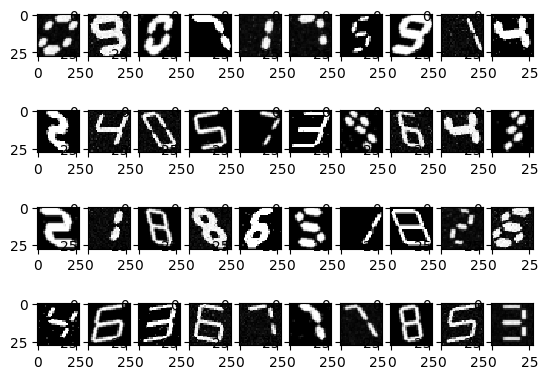

In [4]:
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_treino[i].reshape((28,28)),interpolation='nearest',cmap='gray')
plt.show()

## Desenvolvendo Camadas da Rede Convolucional

In [6]:
modelo = Sequential()                   # Criar modelo sequencial para arquitetura da rede

INPUT_SHAPE=(28, 28, 1)                 # Formato do dado de entrada


# Adicionar 1ª Camada de convolução de 32 
# 32 neurônios
# Kernel 3x3 
# Função de Ativação = Relu
modelo.add(layers.Conv2D(32, (3, 3),
                         data_format = 'channels_last', 
                         activation='relu',
                         input_shape=INPUT_SHAPE))
# Pooling de 2x2
modelo.add(layers.MaxPooling2D((2, 2)))



# Adicionar 2ª Camada de convolução de 64 
# 32 neurônios
# Kernel 3x3 
# Função de Ativação = Relu
modelo.add(layers.Conv2D(64, (3, 3),
                         data_format = 'channels_last', 
                         activation='relu',
                         input_shape=INPUT_SHAPE))

# Pooling de 2x2
modelo.add(layers.MaxPooling2D((2, 2)))


modelo.add(Flatten())          # Comprime a matriz 

modelo.add(layers.Dense(100))  # Diminuir a saida para 100 Neurônios


# Diminuir a saida para 10 Neurônios (10 Classes)
# Funçaõ de Ativação Softmax 
modelo.add(layers.Dense(10, activation = 'softmax')) 

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

## Compilar Rede

In [7]:
# Otimizar rede baseada na descida do gradiente 
# Metodo de perda baseada na perda entre as classes e as previsões
# A metrica de juglamento sera pela acur
modelo.compile(
        optimizer= 'adadelta',
        loss= keras.losses.categorical_crossentropy,
        metrics=['accuracy']
)

## Treinar Rede

In [8]:
# Treinar Modelo na bases de treinos
# Repetir a rede 30 vezes
# cada pacote de treino tera um tamanho de 28
# A rede irá realizar comparações aleatórias nos dados de validação(base de teste)
history = modelo.fit(x_treino,y_treino, 
                     epochs=30,
                     batch_size = 28,
                     validation_data=(x_teste,y_teste)
                     )

Epoch 1/30
494/494 [==============================] - 14s 27ms/step - loss: 31.7047 - accuracy: 0.1372 - val_loss: 18.5567 - val_accuracy: 0.1381
Epoch 2/30
494/494 [==============================] - 12s 24ms/step - loss: 14.0060 - accuracy: 0.1825 - val_loss: 11.5123 - val_accuracy: 0.2171
Epoch 3/30
494/494 [==============================] - 12s 24ms/step - loss: 9.2266 - accuracy: 0.2836 - val_loss: 7.9155 - val_accuracy: 0.3389
Epoch 4/30
494/494 [==============================] - 12s 23ms/step - loss: 6.3489 - accuracy: 0.3990 - val_loss: 5.6313 - val_accuracy: 0.4408
Epoch 5/30
494/494 [==============================] - 12s 23ms/step - loss: 4.5564 - accuracy: 0.4987 - val_loss: 4.1765 - val_accuracy: 0.5245
Epoch 6/30
494/494 [==============================] - 12s 24ms/step - loss: 3.3797 - accuracy: 0.5756 - val_loss: 3.1916 - val_accuracy: 0.5890
Epoch 7/30
494/494 [==============================] - 12s 23ms/step - loss: 2.5783 - accuracy: 0.6398 - val_loss: 2.4217 - val_accur

## Plotar Curva de aprendizado

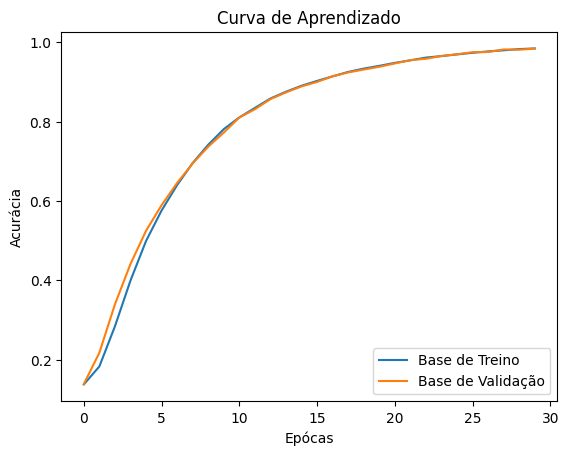

In [9]:
plt.plot(history.history['accuracy'], label='Base de Treino')
plt.plot(history.history['val_accuracy'], label='Base de Validação')
plt.title("Curva de Aprendizado")
plt.xlabel('Epócas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')

## Validação da rede, utilizando na base de teste

In [10]:
perda, accuracy = modelo.evaluate(x_teste,y_teste)
print("Perda:",perda)
print("Acurácia:",accuracy)

108/108 [==============================] - 1s 9ms/step - loss: 0.0499 - accuracy: 0.9838
Perda: 0.04989148676395416
Acurácia: 0.9837915897369385


# Criando Função para Inferência

In [11]:
def previsao(matriz):
    matriz = matriz.reshape(1,28,28,1)
    predict = np.argmax(modelo.predict(matriz),axis=-1)
    print("Digito:",predict)
    return predict

# Teste para visualizar predição e imagem real

### Selecionando a obersvação nº999 da base de teste para realizar predição

In [59]:
previsao(x_teste[999])

1/1 [==============================] - 0s 111ms/step
Digito: [1]


array([1], dtype=int64)

## Plotando digitio da observação nº999

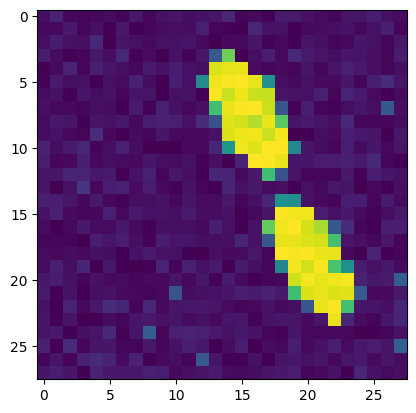

In [12]:
plt.imshow(x_teste[999].reshape((28,28)),interpolation='nearest')

# Salvando Modelo

In [16]:
modelo.save("Model_CNN.h5")
print("Modelo Salvo")

Modelo Salvo


In [11]:
predict = np.argmax(modelo.predict(x_teste),axis=-1)

108/108 [==============================] - 1s 9ms/step


In [12]:
predict

array([7, 0, 3, ..., 9, 7, 2], dtype=int64)

In [13]:
y_teste_real

array([7, 0, 3, ..., 8, 7, 2])

In [14]:
labels = [0,1,2,3,4,5,6,7,8,9]

In [16]:
matrix = confusion_matrix(y_teste_real,predict,labels = labels)

In [17]:
pd.DataFrame(matrix, index= labels, columns = labels)

,0,1,2,3,4,5,6,7,8,9
0,349,0,0,0,0,0,0,0,1,1
1,0,338,0,0,0,0,0,2,0,0
2,0,0,377,0,0,0,0,0,2,0
3,0,0,0,338,0,0,0,0,0,2
4,0,0,0,0,350,0,0,0,0,3
5,0,0,0,0,0,354,3,0,0,4
6,2,0,0,0,0,1,350,0,6,0
7,2,1,0,0,0,0,0,324,0,0
8,2,0,1,0,0,0,7,0,293,4
9,0,0,0,3,1,3,0,0,5,326


In [19]:
classi = classification_report(y_teste_real,predict)

In [30]:
print(classi)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       351
           1       1.00      0.99      1.00       340
           2       1.00      0.99      1.00       379
           3       0.99      0.99      0.99       340
           4       1.00      0.99      0.99       353
           5       0.99      0.98      0.98       361
           6       0.97      0.97      0.97       359
           7       0.99      0.99      0.99       327
           8       0.95      0.95      0.95       307
           9       0.96      0.96      0.96       338

    accuracy                           0.98      3455
   macro avg       0.98      0.98      0.98      3455
weighted avg       0.98      0.98      0.98      3455

